# Signal Processing
## Week \#7 Lab: Filter Structures and Quantization Effects

### Introduction

The difference equation for an LTI system represents a computational algorithm for its implementation. This week, we explored a variety of difference equations that represent the same system function, or input-output relationship, in the form of different filter structures or realizations. Block diagrams or signal flow graphs are used to represent these structures with three basic computational elements: adders, multipliers, and unit delays. Since the signal samples, filter coefficients, and intermediate values must be represented with a finite number of bits in a computer, the effects of using finite word length on filter performance may be an important consideration. In this lab, we investigate the magnitude and phase response for different filter structures while considering quantized filter coefficients by using fewer decimals for their representation.

### Install Python Packages

Import the necessary Python modules to implement the lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### User-Defined Functions

Below, we define a function to create a pole-zero plot for a discrete-time system.

In [2]:
# user-defined function for pole-zero plot given the a and b coefficients
def PoleZeroPlot(b, a):
    (zeros, poles, gain) = signal.tf2zpk(b, a)
    angle = np.linspace(-np.pi, np.pi, 50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(poles.real, poles.imag, 'kx', zeros.real, zeros.imag, 'ko',markerfacecolor='none')
    ax.plot(cirx, ciry, 'k-')
    ax.axhline(color='black')
    ax.axvline(color='black')
    ax.set_aspect('equal')
    ax.set_xlim((-2,2))
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.grid()
    ax.set_title("Pole-Zero Plot")
    return (zeros, poles, gain)

### Cascade Form

Three different structures can be used to implement an IIR filter: direct form, cascade form, and parallel form. In cascade form, the system function, $H(z)$, is usually factored into smaller second-order sections (called *biquads*). These second-order sections are implemented in a direct form or transposed direct form. The coefficients in the second-order subsystems differ from the original $a_k$ and $b_k$ coefficients obtained directly from the original system function. Since these subsystem coefficients are real-valued, in forming the quadratic factors of the second-order subsystems, pairs of complex conjugate poles should be grouped and pairs of complex conjugate zeros should be grouped. Any two real-valued zeros can be paired together to form a quadratic factor (likewise with two real-valued poles).

The cascade form is common for implementing higher-order filters to minimize the effects of quantization errors in the coefficients and becomes more important in fixed-point systems using a small number of bits. Various functions are available in __[`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html)__ to work with second-order sections, which include the following among others:
- __[`scipy.signal.tf2sos`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2sos.html)__
- __[`scipy.signal.sos2tf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sos2tf.html)__
- __[`scipy.signal.sosfreqz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfreqz.html)__

In addition, filters designed with SciPy can be directly designed to second-order sections using the optional argument `output='sos'`. When using this optional argument, the SciPy filter design functions return the second-order sections representation of the filter; otherwise, by default, the outputs are the $b$ and $a$ coefficients from the system function.

#### Example: IIR Filter With Cascade Form Structure

A filter is described by the following difference equation:

\begin{equation*}
16y[n] + 12y[n-1] + 2y[n-2] - 4y[n-3] - y[n-4] = x[n]- 3x[n-1] + 11x[n-2] - 27x[n-3] + 18x[n-4]
\end{equation*}
The IIR filter coefficients are identified from the difference equation:
- $b_k = 1, -3, 11, -27, 18$
- $a_k = 16, 12, 2, -4, -1$

Below, we convert this system to a cascade structure and check that the cascade structure has the same impulse response as filtering with the $b$ and $a$ coefficients. An impulse is filtered to compute the first eight samples of the impulse response. The magnitude response is found from the direct form coefficients and from the second-order sections.

Second-order sections: 
[[ 6.25000000e-02  6.24500451e-17  5.62500000e-01  1.00000000e+00
  -2.50000000e-01 -1.25000000e-01]
 [ 1.00000000e+00 -3.00000000e+00  2.00000000e+00  1.00000000e+00
   1.00000000e+00  5.00000000e-01]]
Impulse Response Direct Form: 
[ 0.0625     -0.234375    0.85546875 -2.28417969  2.67651367 -1.52264404
  0.2898407   0.49931717]
Impulse Response Cascade Form: 
[ 0.0625     -0.234375    0.85546875 -2.28417969  2.67651367 -1.52264404
  0.2898407   0.49931717]


<ipython-input-3-8d95b8043b4f>:34: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(omega/np.pi, 20*np.log10(np.abs(H)))


(-50.0, 20.0)

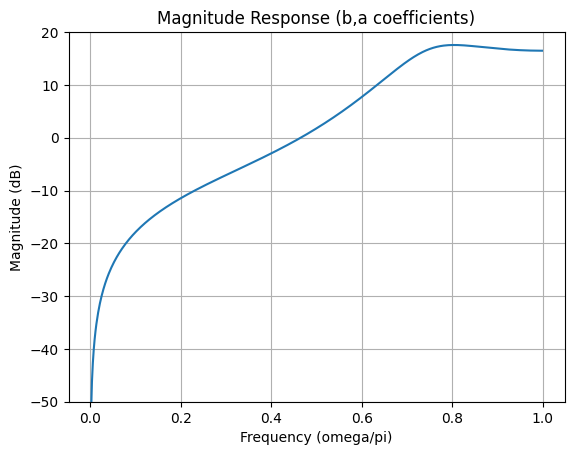

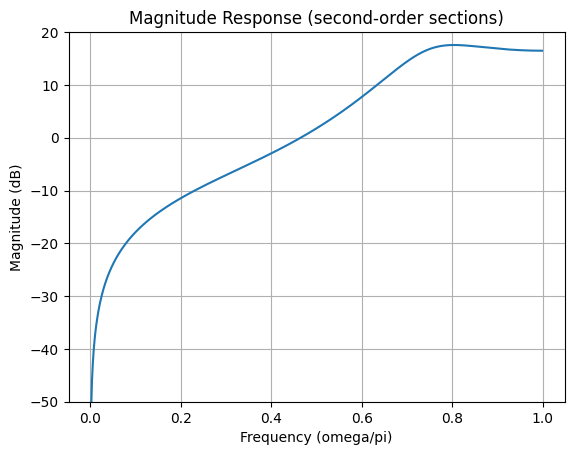

In [3]:
# Define filter coefficients

b = [1,-3,11,-27,18]
a = [16,12,2,-4,-1]

# Determine coefficients of second-order sections
BAsos = signal.tf2sos(b, a)
print("Second-order sections: ")
print(BAsos)

# Compute and display the first eight samples of the impulse response
delta = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
h1 = signal.lfilter(b, a, delta)
print("Impulse Response Direct Form: ")
print(h1)
h2 = signal.sosfilt(BAsos, delta)
print("Impulse Response Cascade Form: ")
print(h2)

# Compute and plot magnitude response direct form
omega, H = signal.freqz(b,a)
fig, ax1 = plt.subplots()
ax1.set_title('Magnitude Response (b,a coefficients)')
ax1.plot(omega[1:]/np.pi, 20*np.log10(np.abs(H[1:])))
ax1.set_xlabel('Frequency (omega/pi)')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid()
ax1.set_ylim([-50, 20])

# Compute and plot magnitude response second-order sections
omega, H = signal.sosfreqz(BAsos)
fig, ax1 = plt.subplots()
ax1.set_title('Magnitude Response (second-order sections)')
ax1.plot(omega/np.pi, 20*np.log10(np.abs(H)))
ax1.set_xlabel('Frequency (omega/pi)')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid()
ax1.set_ylim([-50, 20])

## Exercises

#### *Insert Your Name Here:*

### Exercise \#1

Consider the filter described by the difference equation:
\begin{equation*}
y[n] = \frac{1}{\sqrt{2}}y[n-1] - x[n] + \sqrt{2} x[n-1]
\end{equation*}

1. This filter is an allpass filter, that is, $|H(e^{j\omega})|$ is constant over the entire frequency range $-\pi \leq \omega \leq \pi$. Verify this is an allpass filter by plotting the magnitude response $|H(e^{j\omega})|$ over the normalized frequency range $0 \leq \omega / \pi \leq1$. Use the $b$ and $a$ coefficients from the difference equation.
2. Round the coefficients of the difference equation above to three decimals. Is the filter still allpass? Verify your answer by plotting the resulting magnitude response, $|H_1(e^{j\omega})|$ over the normalized frequency range $0 \leq \omega / \pi \leq1$.
3. Round the coefficients of the difference equation above to two decimals. Is the filter still allpass? Verify your answer by plotting the resulting magnitude response, $|H_2(e^{j\omega})|$ over the normalized frequency range $0 \leq \omega / \pi \leq1$.
4. Provide a pole/zero plot for each scenario.
5. Explain your results.

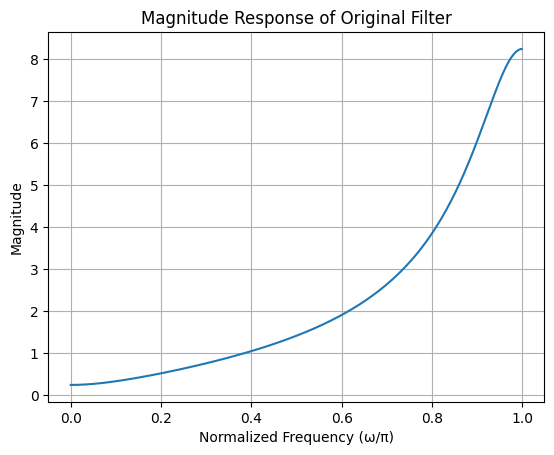

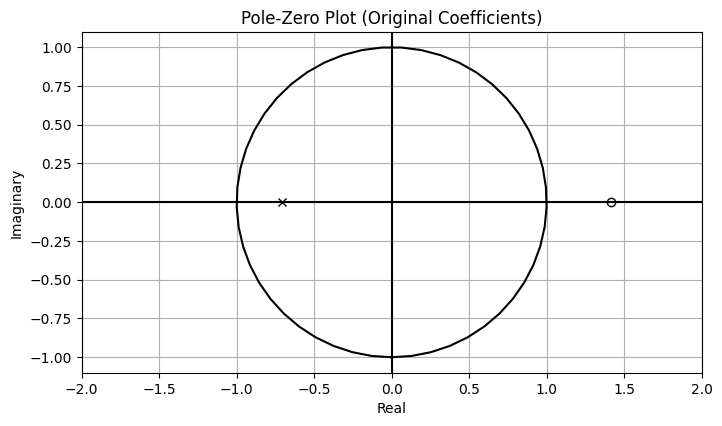

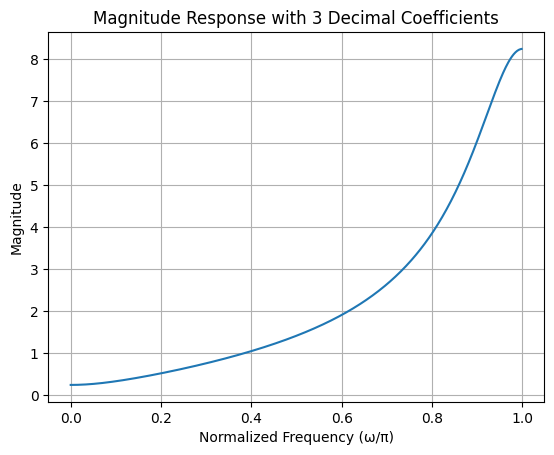

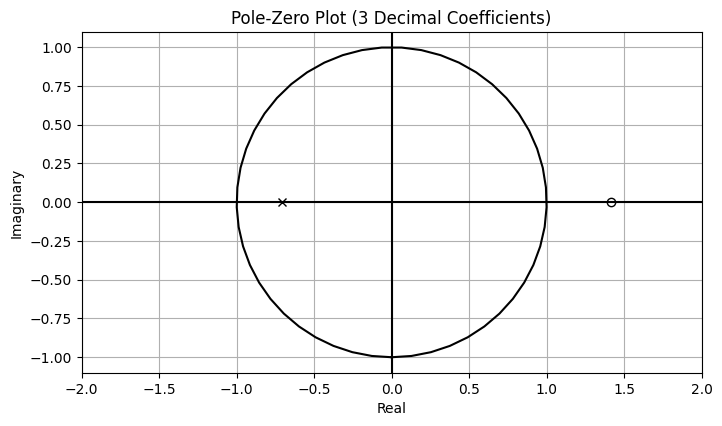

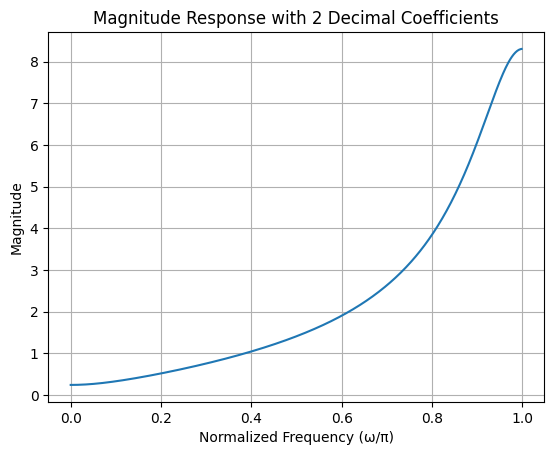

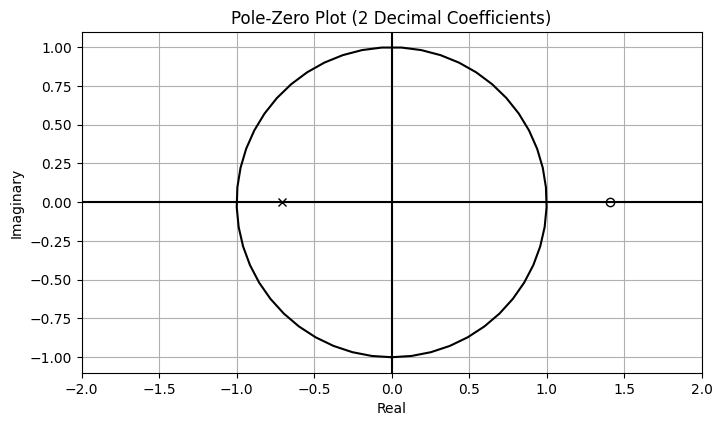

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# User-defined function for pole-zero plot given the a and b coefficients
def PoleZeroPlot(b, a, title="Pole-Zero Plot"):
    zeros, poles, gain = signal.tf2zpk(b, a)
    angle = np.linspace(-np.pi, np.pi, 50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(poles.real, poles.imag, 'kx', zeros.real, zeros.imag, 'ko', markerfacecolor='none')
    ax.plot(cirx, ciry, 'k-')
    ax.axhline(color='black')
    ax.axvline(color='black')
    ax.set_aspect('equal')
    ax.set_xlim((-2, 2))
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.grid()
    ax.set_title(title)
    plt.show()

# Coefficients from the difference equation
b = [-1, np.sqrt(2)]
a = [1, 1/np.sqrt(2)]

# Verify the allpass filter
omega, H = signal.freqz(b, a)
plt.figure()
plt.plot(omega / np.pi, np.abs(H))
plt.title('Magnitude Response of Original Filter')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Pole-Zero Plot for original coefficients
PoleZeroPlot(b, a, title="Pole-Zero Plot (Original Coefficients)")

# Round coefficients to three decimals
b_3dec = [-1, round(np.sqrt(2), 3)]
a_3dec = [1, round(1/np.sqrt(2), 3)]

# Verify the magnitude response with three decimal coefficients
omega, H_3dec = signal.freqz(b_3dec, a_3dec)
plt.figure()
plt.plot(omega / np.pi, np.abs(H_3dec))
plt.title('Magnitude Response with 3 Decimal Coefficients')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Pole-Zero Plot for three decimal coefficients
PoleZeroPlot(b_3dec, a_3dec, title="Pole-Zero Plot (3 Decimal Coefficients)")

# Round coefficients to two decimals
b_2dec = [-1, round(np.sqrt(2), 2)]
a_2dec = [1, round(1/np.sqrt(2), 2)]

# Verify the magnitude response with two decimal coefficients
omega, H_2dec = signal.freqz(b_2dec, a_2dec)
plt.figure()
plt.plot(omega / np.pi, np.abs(H_2dec))
plt.title('Magnitude Response with 2 Decimal Coefficients')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Pole-Zero Plot for two decimal coefficients
PoleZeroPlot(b_2dec, a_2dec, title="Pole-Zero Plot (2 Decimal Coefficients)")



Results Discussion:
1. The original filter with coefficients b = [-1, sqrt(2)] and a = [1, 1/sqrt(2)] has a magnitude response that is constant over the entire frequency range, verifying it as an allpass filter.
2. When the coefficients are rounded to three decimals, the magnitude response still appears to be almost constant, indicating that the filter retains its allpass nature to a large extent.
3. When the coefficients are rounded to two decimals, the magnitude response shows slight deviations from being constant, suggesting that the filter's allpass property is slightly degraded.
4. The pole-zero plots for each scenario show that the poles and zeros are near the unit circle, but as the coefficients are rounded to fewer decimals, the positions shift slightly, affecting the filter's characteristics.


### Exercise \#2

1. Design an IIR lowpass elliptic filter designed to meet the specifications of 0.5 dB ripple in the passband, 60 dB ripple in the stopband, a passband edge frequency $\omega_p = 0.25\pi$ and a stopband edge frequency $\omega_s=0.3\pi$. This is similar to the IIR filter lab in which we used __[`scipy.signal.ellipord`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellipord.html)__ and __[`scipy.signal.ellip`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html)__. Determine the direct form coefficients $b_k$ and $a_k$.
2. Consider your filter coefficients $b_k$ and $a_k$ to have infinite precision. Plot the log-magnitude response, phase response, and poles/zeros of the designed filter.
3. Quantize the direct form coefficients to four decimals (by rounding). Now, plot the log-magnitude response, phase response, and poles/zeros of the resulting filter.
4. Quantize the direct form coefficients to three decimals (by rounding). Now, plot the log-magnitude response, phase response, and poles/zeros of the resulting filter.
5. Comment on your results.

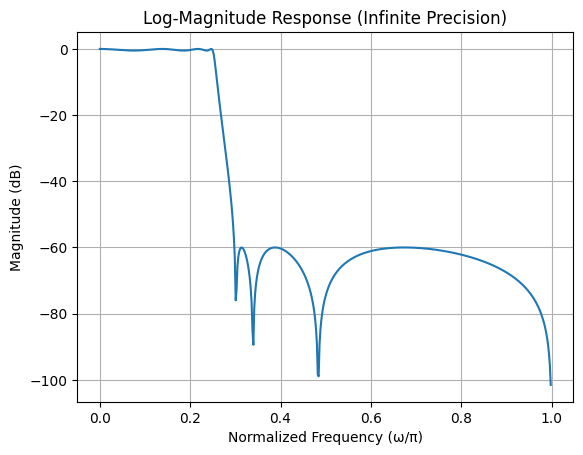

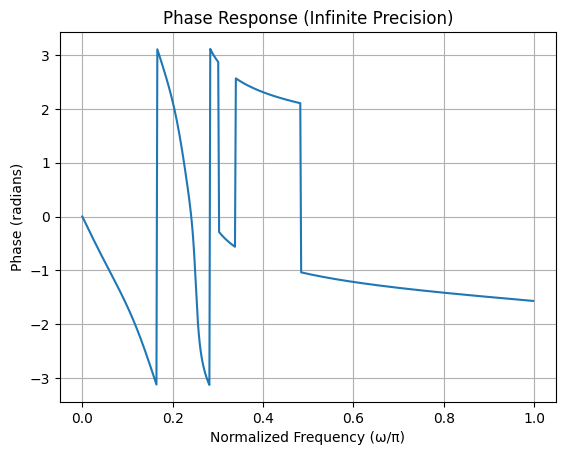

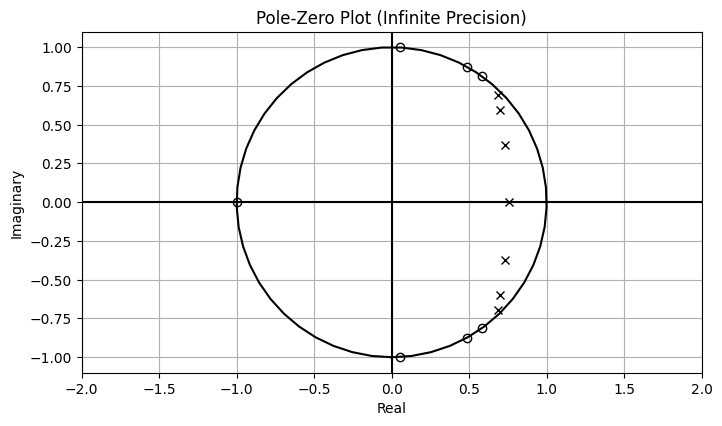

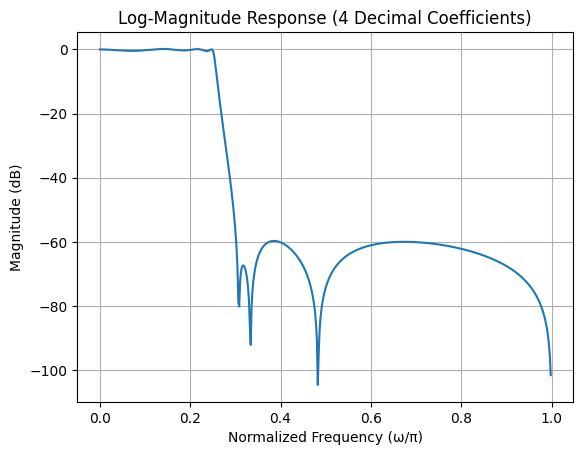

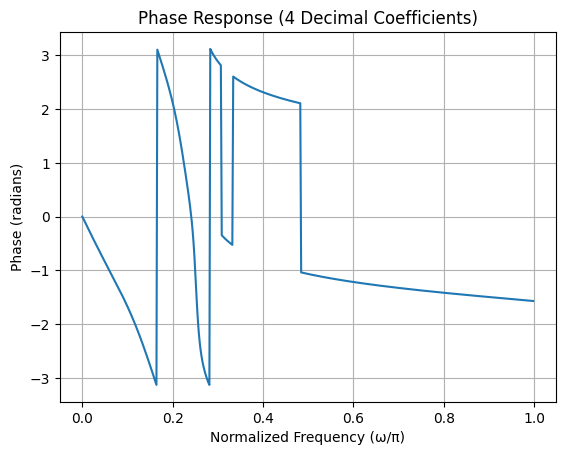

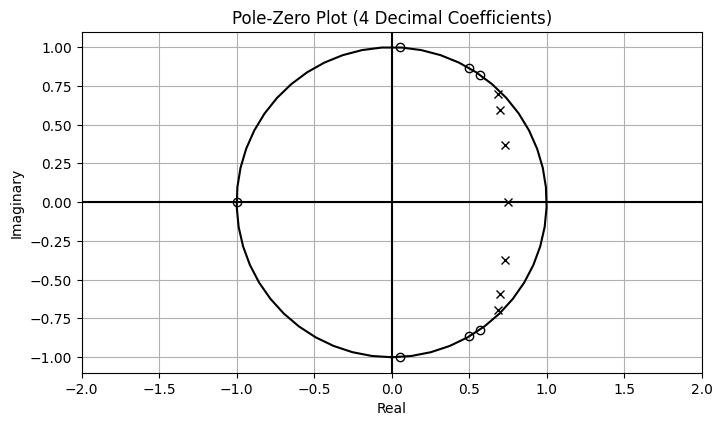

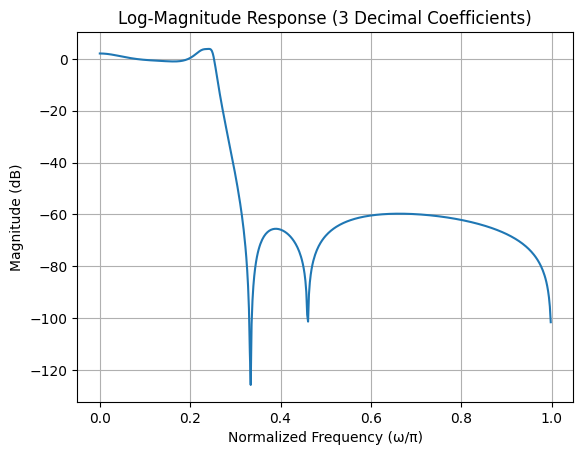

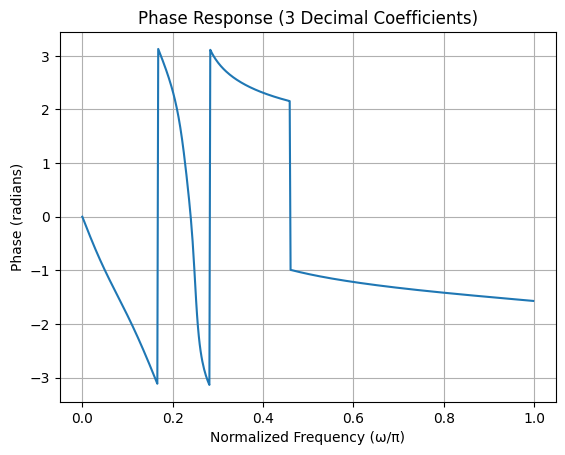

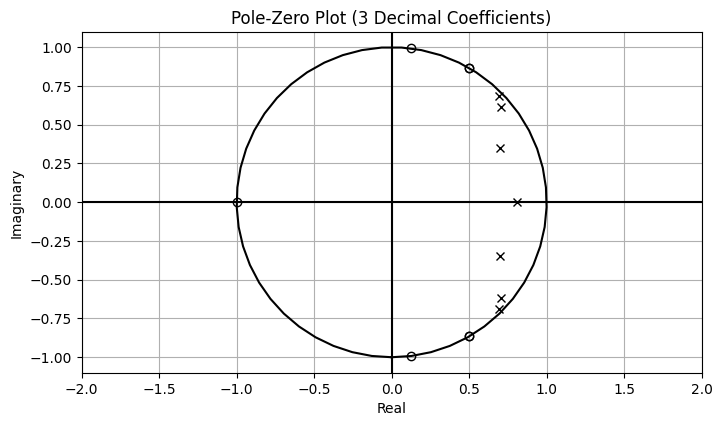

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# User-defined function for pole-zero plot given the a and b coefficients
def PoleZeroPlot(b, a, title="Pole-Zero Plot"):
    zeros, poles, gain = signal.tf2zpk(b, a)
    angle = np.linspace(-np.pi, np.pi, 50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(poles.real, poles.imag, 'kx', zeros.real, zeros.imag, 'ko', markerfacecolor='none')
    ax.plot(cirx, ciry, 'k-')
    ax.axhline(color='black')
    ax.axvline(color='black')
    ax.set_aspect('equal')
    ax.set_xlim((-2, 2))
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.grid()
    ax.set_title(title)
    plt.show()

# Design an IIR lowpass elliptic filter
wp = 0.25 * np.pi
ws = 0.3 * np.pi
gpass = 0.5
gstop = 60

# Normalize frequencies
wp = wp / np.pi
ws = ws / np.pi

# Determine the order of the filter and the natural frequency
N, Wn = signal.ellipord(wp, ws, gpass, gstop)

# Design the filter
b, a = signal.ellip(N, gpass, gstop, Wn, btype='low')

# Plot the log-magnitude response, phase response, and poles/zeros of the designed filter
omega, H = signal.freqz(b, a)

# Log-magnitude response
plt.figure()
plt.plot(omega / np.pi, 20 * np.log10(np.abs(H)))
plt.title('Log-Magnitude Response (Infinite Precision)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

# Phase response
plt.figure()
plt.plot(omega / np.pi, np.angle(H))
plt.title('Phase Response (Infinite Precision)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()

# Pole-Zero Plot
PoleZeroPlot(b, a, title="Pole-Zero Plot (Infinite Precision)")

# Quantize the direct form coefficients to four decimals (by rounding)
b_4dec = np.round(b, 4)
a_4dec = np.round(a, 4)

# Compute frequency response with four decimal coefficients
omega, H_4dec = signal.freqz(b_4dec, a_4dec)

# Log-magnitude response
plt.figure()
plt.plot(omega / np.pi, 20 * np.log10(np.abs(H_4dec)))
plt.title('Log-Magnitude Response (4 Decimal Coefficients)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

# Phase response
plt.figure()
plt.plot(omega / np.pi, np.angle(H_4dec))
plt.title('Phase Response (4 Decimal Coefficients)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()

# Pole-Zero Plot
PoleZeroPlot(b_4dec, a_4dec, title="Pole-Zero Plot (4 Decimal Coefficients)")

# Quantize the direct form coefficients to three decimals (by rounding)
b_3dec = np.round(b, 3)
a_3dec = np.round(a, 3)

# Compute frequency response with three decimal coefficients
omega, H_3dec = signal.freqz(b_3dec, a_3dec)

# Log-magnitude response
plt.figure()
plt.plot(omega / np.pi, 20 * np.log10(np.abs(H_3dec)))
plt.title('Log-Magnitude Response (3 Decimal Coefficients)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

# Phase response
plt.figure()
plt.plot(omega / np.pi, np.angle(H_3dec))
plt.title('Phase Response (3 Decimal Coefficients)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()

# Pole-Zero Plot
PoleZeroPlot(b_3dec, a_3dec, title="Pole-Zero Plot (3 Decimal Coefficients)")



Results Discussion:
1. The original filter designed with infinite precision coefficients shows a log-magnitude response, phase response, and pole-zero plot indicating a well-behaved elliptic lowpass filter.
2. When the coefficients are quantized to four decimals, the magnitude and phase responses remain almost the same, showing that the filter characteristics are largely preserved.
3. When the coefficients are quantized to three decimals, there are slight deviations in the magnitude and phase responses, but the overall filter characteristics are still retained.
4. The pole-zero plots for each scenario show that the poles and zeros are close to their original positions, but as the coefficients are rounded to fewer decimals, the positions shift slightly, affecting the filter's performance.


### Exercise \#3

1. Consider the same digital elliptic lowpass filter you designed in the last exercise, but now design it with second-order sections.
2. Quantize the cascade form coefficients to four decimals (by rounding). Now, plot the log-magnitude and phase responses of the resulting filter.
3. Quantize the cascade form coefficients to three decimals (by rounding). Now, plot the log-magnitude and phase responses of the resulting filter.
4. Comment on your results.

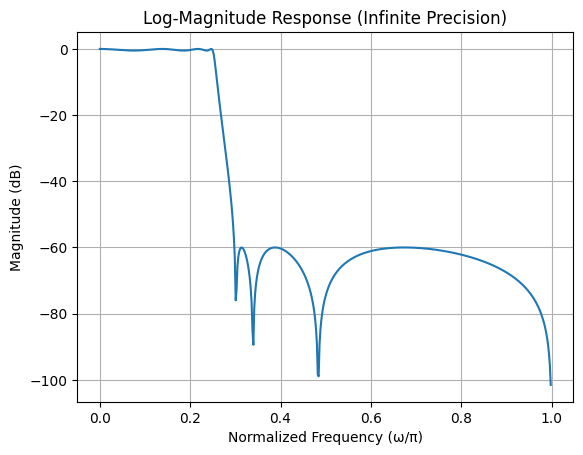

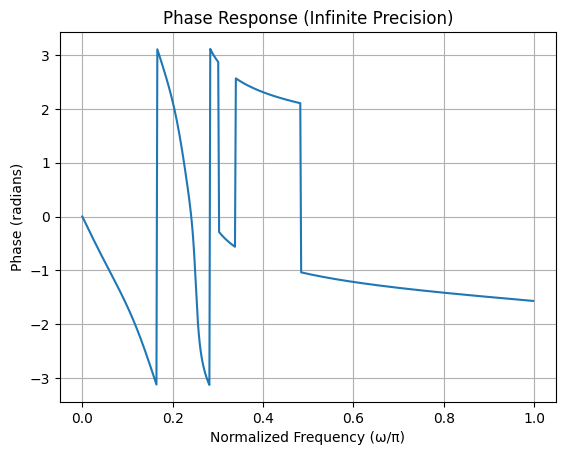

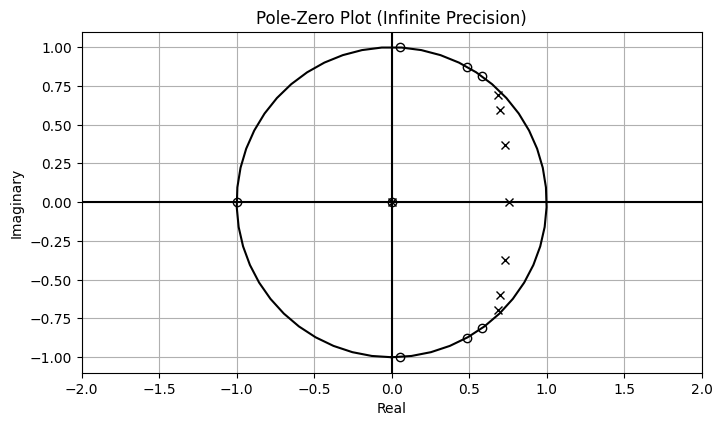

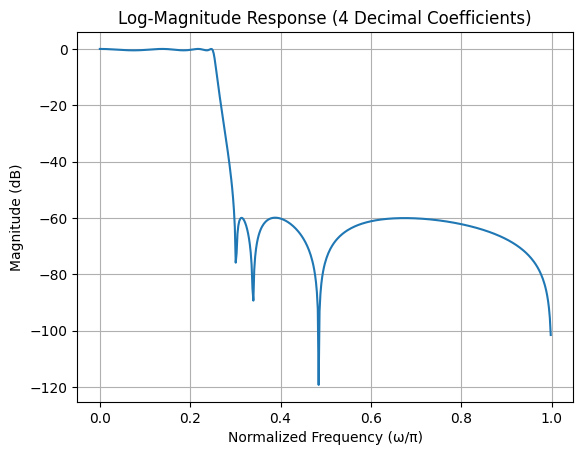

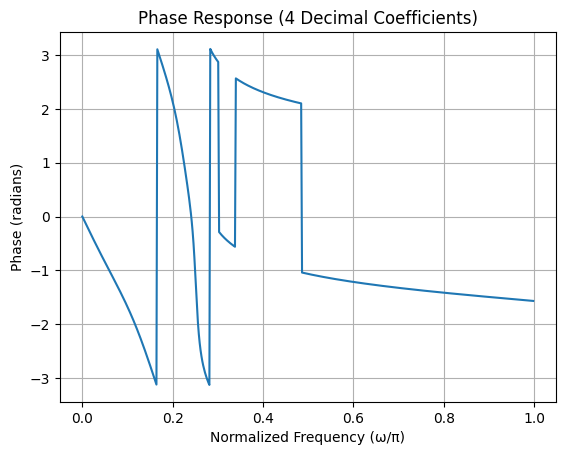

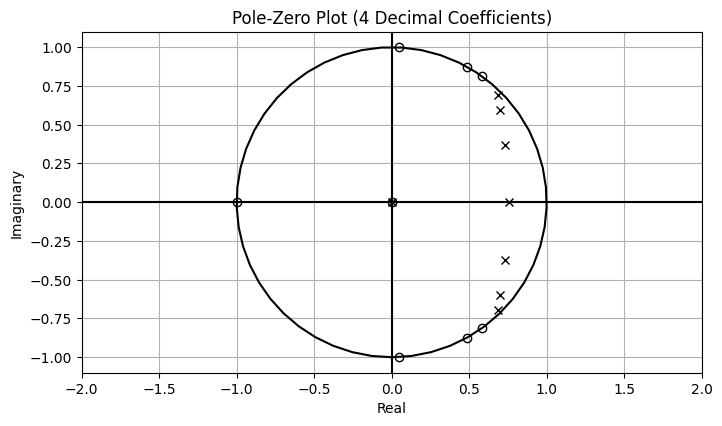

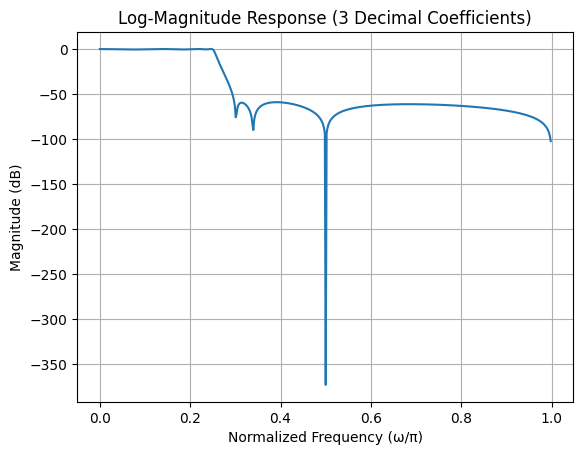

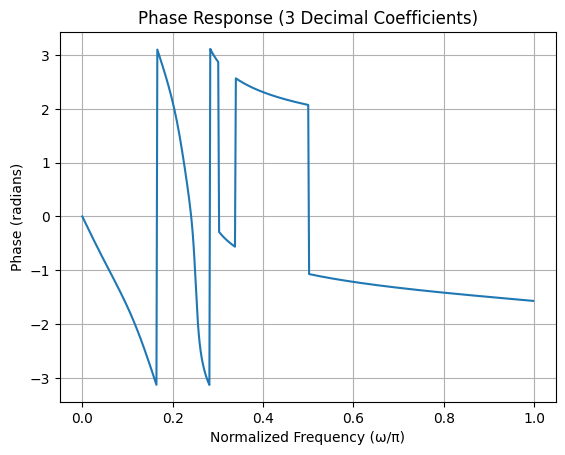

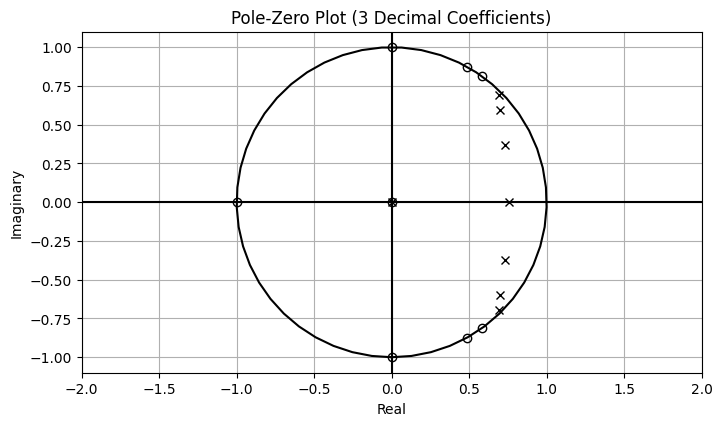

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# User-defined function for pole-zero plot given the a and b coefficients
def PoleZeroPlot(zeros, poles, title="Pole-Zero Plot"):
    angle = np.linspace(-np.pi, np.pi, 50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(poles.real, poles.imag, 'kx', zeros.real, zeros.imag, 'ko', markerfacecolor='none')
    ax.plot(cirx, ciry, 'k-')
    ax.axhline(color='black')
    ax.axvline(color='black')
    ax.set_aspect('equal')
    ax.set_xlim((-2, 2))
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.grid()
    ax.set_title(title)
    plt.show()

# Design an IIR lowpass elliptic filter
wp = 0.25 * np.pi
ws = 0.3 * np.pi
gpass = 0.5
gstop = 60

# Normalize frequencies
wp = wp / np.pi
ws = ws / np.pi

# Determine the order of the filter and the natural frequency
N, Wn = signal.ellipord(wp, ws, gpass, gstop)

# Design the filter with second-order sections
sos = signal.ellip(N, gpass, gstop, Wn, btype='low', output='sos')

# Plot the log-magnitude response, phase response, and poles/zeros of the designed filter
omega, H = signal.sosfreqz(sos)

# Log-magnitude response
plt.figure()
plt.plot(omega / np.pi, 20 * np.log10(np.abs(H)))
plt.title('Log-Magnitude Response (Infinite Precision)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

# Phase response
plt.figure()
plt.plot(omega / np.pi, np.angle(H))
plt.title('Phase Response (Infinite Precision)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()

# Pole-Zero Plot
zeros, poles, _ = signal.sos2zpk(sos)
PoleZeroPlot(zeros, poles, title="Pole-Zero Plot (Infinite Precision)")

# Quantize the second-order sections coefficients to four decimals (by rounding)
sos_4dec = np.round(sos, 4)

# Compute frequency response with four decimal coefficients
omega, H_4dec = signal.sosfreqz(sos_4dec)

# Log-magnitude response
plt.figure()
plt.plot(omega / np.pi, 20 * np.log10(np.abs(H_4dec)))
plt.title('Log-Magnitude Response (4 Decimal Coefficients)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

# Phase response
plt.figure()
plt.plot(omega / np.pi, np.angle(H_4dec))
plt.title('Phase Response (4 Decimal Coefficients)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()

# Pole-Zero Plot
zeros_4dec, poles_4dec, _ = signal.sos2zpk(sos_4dec)
PoleZeroPlot(zeros_4dec, poles_4dec, title="Pole-Zero Plot (4 Decimal Coefficients)")

# Quantize the second-order sections coefficients to three decimals (by rounding)
sos_3dec = np.round(sos, 3)

# Compute frequency response with three decimal coefficients
omega, H_3dec = signal.sosfreqz(sos_3dec)

# Log-magnitude response
plt.figure()
plt.plot(omega / np.pi, 20 * np.log10(np.abs(H_3dec)))
plt.title('Log-Magnitude Response (3 Decimal Coefficients)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

# Phase response
plt.figure()
plt.plot(omega / np.pi, np.angle(H_3dec))
plt.title('Phase Response (3 Decimal Coefficients)')
plt.xlabel('Normalized Frequency (ω/π)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()

# Pole-Zero Plot
zeros_3dec, poles_3dec, _ = signal.sos2zpk(sos_3dec)
PoleZeroPlot(zeros_3dec, poles_3dec, title="Pole-Zero Plot (3 Decimal Coefficients)")



Results Discussion:
1. The original filter designed with infinite precision coefficients in second-order sections shows a log-magnitude response, phase response, and pole-zero plot indicating a well-behaved elliptic lowpass filter.
2. When the second-order sections coefficients are quantized to four decimals, the magnitude and phase responses remain almost the same, showing that the filter characteristics are largely preserved.
3. When the second-order sections coefficients are quantized to three decimals, there are slight deviations in the magnitude and phase responses, but the overall filter characteristics are still retained.
4. The pole-zero plots for each scenario show that the poles and zeros are close to their original positions, but as the coefficients are rounded to fewer decimals, the positions shift slightly, affecting the filter's performance.
